In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [10]:
ecg_df = pd.read_csv("C:/Users/vinay/Desktop/dataming/Dataframe_Study1_ECGsignal.csv")
ecg_df.head(10)

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1,379,788.448549,76.492247,5.554568,24.140212,56.312050,33.645640,23.467771,8.730159,...,9.127375,35.386024,64.613976,0.547653,16628.50302,23.790554,75.878758,3.189449,1.317064,-1
1,1,41,709.195122,85.378220,8.033552,22.500000,70.404978,28.694076,18.034156,10.000000,...,9.339315,34.448705,65.551295,0.525523,20076.79993,20.189446,95.378057,4.724154,0.875469,209
2,1,221,806.058824,74.636723,3.873437,22.600000,42.029223,28.815400,17.917212,5.909091,...,9.138723,35.567556,64.432444,0.552013,16940.95477,20.374770,55.541974,2.726017,1.571471,309
3,2,378,789.243386,76.823032,8.294635,49.655172,79.254143,82.813747,66.363866,30.769231,...,9.204025,33.320305,66.679695,0.499707,17331.45624,58.558162,95.315830,1.627712,1.413580,-1
4,2,40,730.800000,82.442370,5.380247,25.615385,47.555743,32.193725,19.755899,12.820513,...,9.319440,34.997279,65.002721,0.538397,19876.97129,22.752260,63.100074,2.773354,inf,209
5,2,222,806.202703,75.091770,7.454646,55.886878,74.809679,79.680272,56.923321,44.343891,...,9.236105,33.390208,66.609792,0.501281,17913.20218,56.342292,89.411923,1.586942,1.662927,108
6,3,389,768.434447,78.455372,5.455468,33.574742,53.156683,43.640902,27.915470,24.226804,...,9.156875,34.336119,65.663881,0.522907,16831.01716,30.858775,68.519106,2.220409,1.546245,-1
7,3,38,743.157895,81.595986,8.265672,45.837838,79.954219,59.475182,38.419840,37.837838,...,9.353887,34.332356,65.667644,0.522820,20317.01303,42.037515,104.609036,2.488469,1.466337,209
8,3,233,765.360515,79.172665,8.081717,35.193966,74.433369,45.246309,28.497609,26.293103,...,9.198059,34.096073,65.903927,0.517360,17457.66936,31.992310,100.145856,3.130310,1.427967,309
9,4,381,768.283465,78.993268,8.552101,41.268421,81.485604,55.093509,36.547602,33.684211,...,9.183292,34.674924,65.325076,0.530806,17287.47866,38.956891,108.437666,2.783530,1.409730,-1


In [11]:
ecg_df.info()
type(ecg_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patien ID             426 non-null    int64  
 1   NNI counter           426 non-null    int64  
 2   NNI mean              426 non-null    float64
 3   HR mean               426 non-null    float64
 4   HR std                426 non-null    float64
 5   NNI diff mean         426 non-null    float64
 6   SDNN                  426 non-null    float64
 7   RMSSD                 426 non-null    float64
 8   SDSD                  426 non-null    float64
 9   pnn50                 426 non-null    float64
 10  pnn20                 426 non-null    float64
 11  TRI Index             426 non-null    float64
 12  Welch LogPower VLF    426 non-null    float64
 13  Welch LogPower LF     426 non-null    float64
 14  Welch LogPower HF     426 non-null    float64
 15  Welch NormPower LF    4

pandas.core.frame.DataFrame

In [13]:
ecg_df.describe()


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,71.500000,229.842723,725.200503,85.550724,7.422686,25.901542,61.065246,35.548384,23.972448,13.229857,...,9.193936,35.019848,64.980152,0.539113,17717.076341,25.068247,81.009650,3.845825,inf,151.931925
std,41.039049,153.087798,116.718220,13.554808,3.810273,15.379412,25.818338,22.768906,17.548837,14.669954,...,0.097562,0.708691,0.708691,0.016713,1528.788960,16.126677,33.998314,1.782814,NaN,121.693047
min,1.000000,25.000000,448.292308,54.100161,1.782548,3.656250,15.312139,5.147815,3.652435,0.000000,...,8.996039,31.695464,62.625243,0.464032,14873.872360,3.423266,19.181090,1.217043,0.135102,-1.000000
25%,36.000000,48.000000,640.069841,76.048456,5.051572,14.592391,42.767282,19.910661,12.976254,1.970205,...,9.112750,34.622675,64.524659,0.529582,16479.850810,14.016304,57.423330,2.728641,0.916291,-1.000000
50%,71.500000,239.500000,720.512500,84.166234,6.754538,22.220853,56.026538,29.584684,19.020444,7.701576,...,9.176565,34.979935,65.020065,0.537987,17307.045695,20.903230,73.066993,3.482087,1.256038,209.000000
75%,107.000000,365.000000,793.882692,94.542527,8.577019,32.541973,73.427228,44.129723,27.906674,20.159574,...,9.287755,35.475341,65.377325,0.549795,19230.009892,31.125572,98.030108,4.529068,1.506427,209.000000
max,142.000000,584.000000,1118.666667,134.227002,41.262452,111.827684,173.175827,195.900838,161.074512,75.000000,...,9.423615,37.374757,68.304536,0.596800,21628.130190,138.522533,216.168967,15.559685,inf,309.000000


In [14]:
ecg_df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [16]:
ecg_df.shape

(426, 31)

In [17]:
ecg_df.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64

In [18]:
# Convert the entire DataFrame to float
ecg_df = ecg_df.astype(float)
ecg_df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,379.0,788.448549,76.492247,5.554568,24.140212,56.312050,33.645640,23.467771,8.730159,...,9.127375,35.386024,64.613976,0.547653,16628.50302,23.790554,75.878758,3.189449,1.317064,-1.0
1,1.0,41.0,709.195122,85.378220,8.033552,22.500000,70.404978,28.694076,18.034156,10.000000,...,9.339315,34.448705,65.551295,0.525523,20076.79993,20.189446,95.378057,4.724154,0.875469,209.0
2,1.0,221.0,806.058824,74.636723,3.873437,22.600000,42.029223,28.815400,17.917212,5.909091,...,9.138723,35.567556,64.432444,0.552013,16940.95477,20.374770,55.541974,2.726017,1.571471,309.0
3,2.0,378.0,789.243386,76.823032,8.294635,49.655172,79.254143,82.813747,66.363866,30.769231,...,9.204025,33.320305,66.679695,0.499707,17331.45624,58.558162,95.315830,1.627712,1.413580,-1.0
4,2.0,40.0,730.800000,82.442370,5.380247,25.615385,47.555743,32.193725,19.755899,12.820513,...,9.319440,34.997279,65.002721,0.538397,19876.97129,22.752260,63.100074,2.773354,inf,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,141.0,37.0,776.621622,77.799390,6.460621,35.277778,67.223240,44.813812,28.028160,36.111111,...,9.361415,34.526841,65.473159,0.527343,20506.97582,31.638804,84.701236,2.677131,1.386294,209.0
422,141.0,201.0,888.263682,68.372099,11.900024,34.015000,70.971439,65.310221,55.892977,16.500000,...,9.222499,34.247917,65.752083,0.520864,17905.53878,46.180180,88.962420,1.926420,1.419817,108.0
423,142.0,382.0,780.811518,77.937091,9.644660,45.335958,89.375295,63.029156,43.844852,33.070866,...,9.194857,34.430237,65.569763,0.525093,17463.32515,44.568291,117.993820,2.647484,1.299780,-1.0
424,142.0,54.0,537.129630,113.451455,13.537283,12.339623,71.166042,16.774869,11.472280,1.886792,...,9.284477,34.812315,65.187685,0.534032,19158.71991,11.587594,98.082551,8.464445,0.416160,209.0


In [19]:
# Duplicates Removal
print('Number of duplicates:',ecg_df.duplicated().sum())
ecg_df = ecg_df.drop_duplicates()

Number of duplicates: 0


In [20]:
def detect_outliers(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3- Q1
  lwr_bound = Q1-1.5 * IQR
  upp_bound = Q3+1.5*   IQR
  ls = df.index[np.logical_or(df[feature_name]<lwr_bound, df[feature_name]>upp_bound)]
  return ls

In [21]:
outliers_detected = {}
for i in ecg_df.columns:
  outliers = detect_outliers(ecg_df, i)
  outliers_detected[i] = outliers
  print('variable', i)
  print(outliers)
  print(ecg_df[i].iloc[outliers])
  print('\n')

variable Patien ID
Index([], dtype='int64')
Series([], Name: Patien ID, dtype: float64)


variable NNI counter
Index([], dtype='int64')
Series([], Name: NNI counter, dtype: float64)


variable NNI mean
Index([54, 55, 56, 81, 83, 276, 277, 278, 297, 299], dtype='int64')
54     1118.666667
55     1102.040000
56     1091.417178
81     1035.107639
83     1068.047904
276    1102.952030
277    1044.148148
278    1084.115854
297    1026.542955
299    1027.335260
Name: NNI mean, dtype: float64


variable HR mean
Index([136, 184, 187, 247], dtype='int64')
136    123.755824
184    126.508103
187    129.245994
247    134.227002
Name: HR mean, dtype: float64


variable HR std
Index([ 19,  50,  93,  94,  95, 136, 137, 184, 185, 191, 208, 209, 289, 302,
       329, 331, 334, 350, 364, 425],
      dtype='int64')
19     35.150223
50     14.031895
93     41.262452
94     31.423748
95     13.989100
136    15.212934
137    15.330747
184    17.045380
185    18.571587
191    15.707999
208    16.674308
209 

In [22]:
print('Outliers detected with IQR method:',list(outliers_detected))

Outliers detected with IQR method: ['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std', 'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index', 'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF', 'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF', 'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF', 'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF', 'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2', 'SampEntropy', 'Label']


In [23]:
for i in ecg_df.columns:
    ecg_df[i] = ecg_df[i].replace(ecg_df[i].iloc[outliers_detected[i]].values,ecg_df[i].median())
    print(ecg_df[i])

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
       ...  
421    141.0
422    141.0
423    142.0
424    142.0
425    142.0
Name: Patien ID, Length: 426, dtype: float64
0      379.0
1       41.0
2      221.0
3      378.0
4       40.0
       ...  
421     37.0
422    201.0
423    382.0
424     54.0
425    209.0
Name: NNI counter, Length: 426, dtype: float64
0      788.448549
1      709.195122
2      806.058824
3      789.243386
4      730.800000
          ...    
421    776.621622
422    888.263682
423    780.811518
424    537.129630
425    851.684210
Name: NNI mean, Length: 426, dtype: float64
0       76.492247
1       85.378220
2       74.636723
3       76.823032
4       82.442370
          ...    
421     77.799390
422     68.372099
423     77.937091
424    113.451455
425     72.571498
Name: HR mean, Length: 426, dtype: float64
0       5.554568
1       8.033552
2       3.873437
3       8.294635
4       5.380247
         ...    
421     6.460621
422    11.900024
423

In [24]:
print(pd.isnull(ecg_df).sum())


Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64


In [25]:
ecg_df.shape


(426, 31)

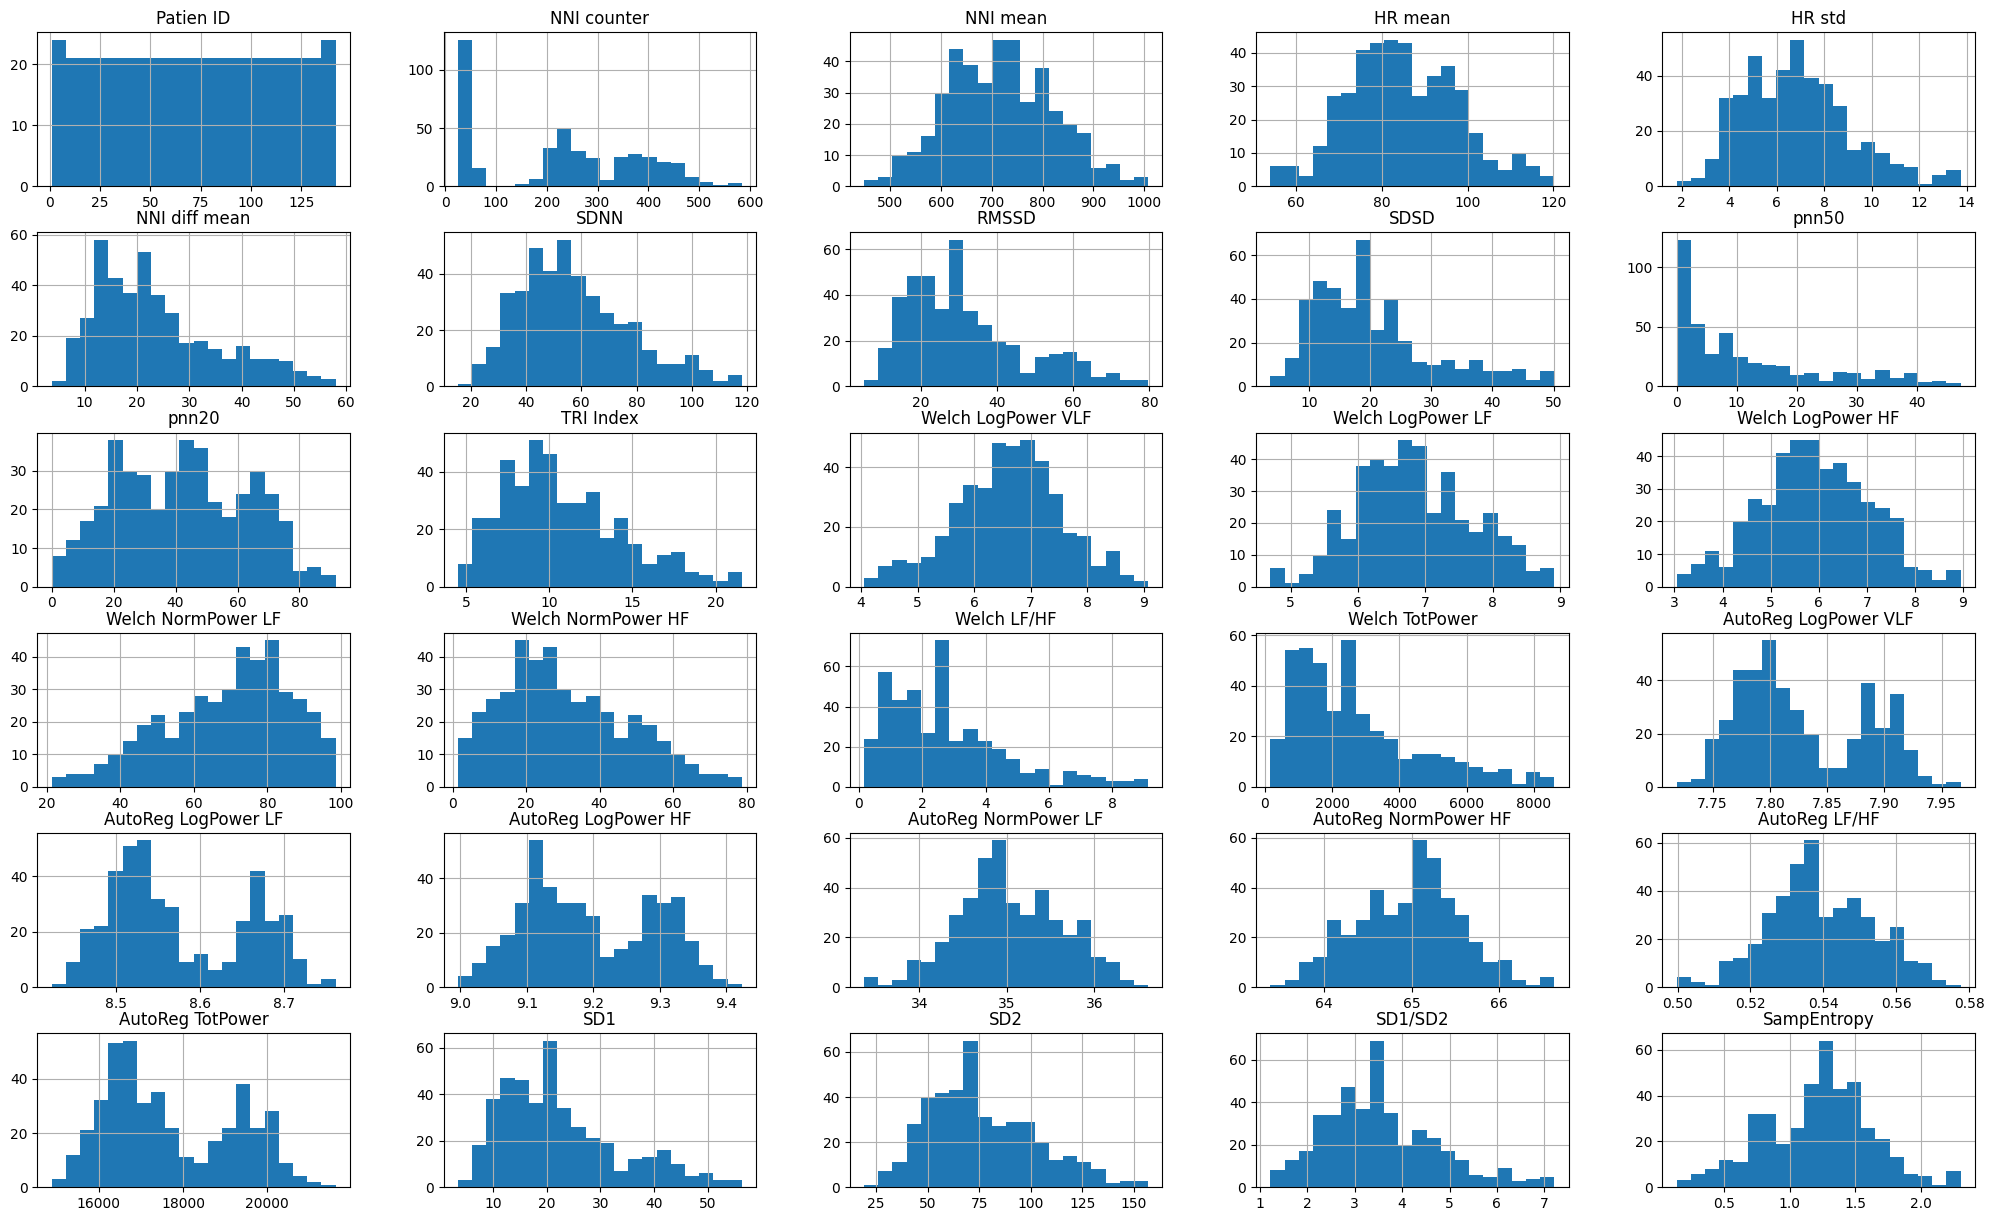

In [26]:
ecg_df.iloc[:,0:-1].hist(bins=20, figsize=(25, 15))
plt.show()

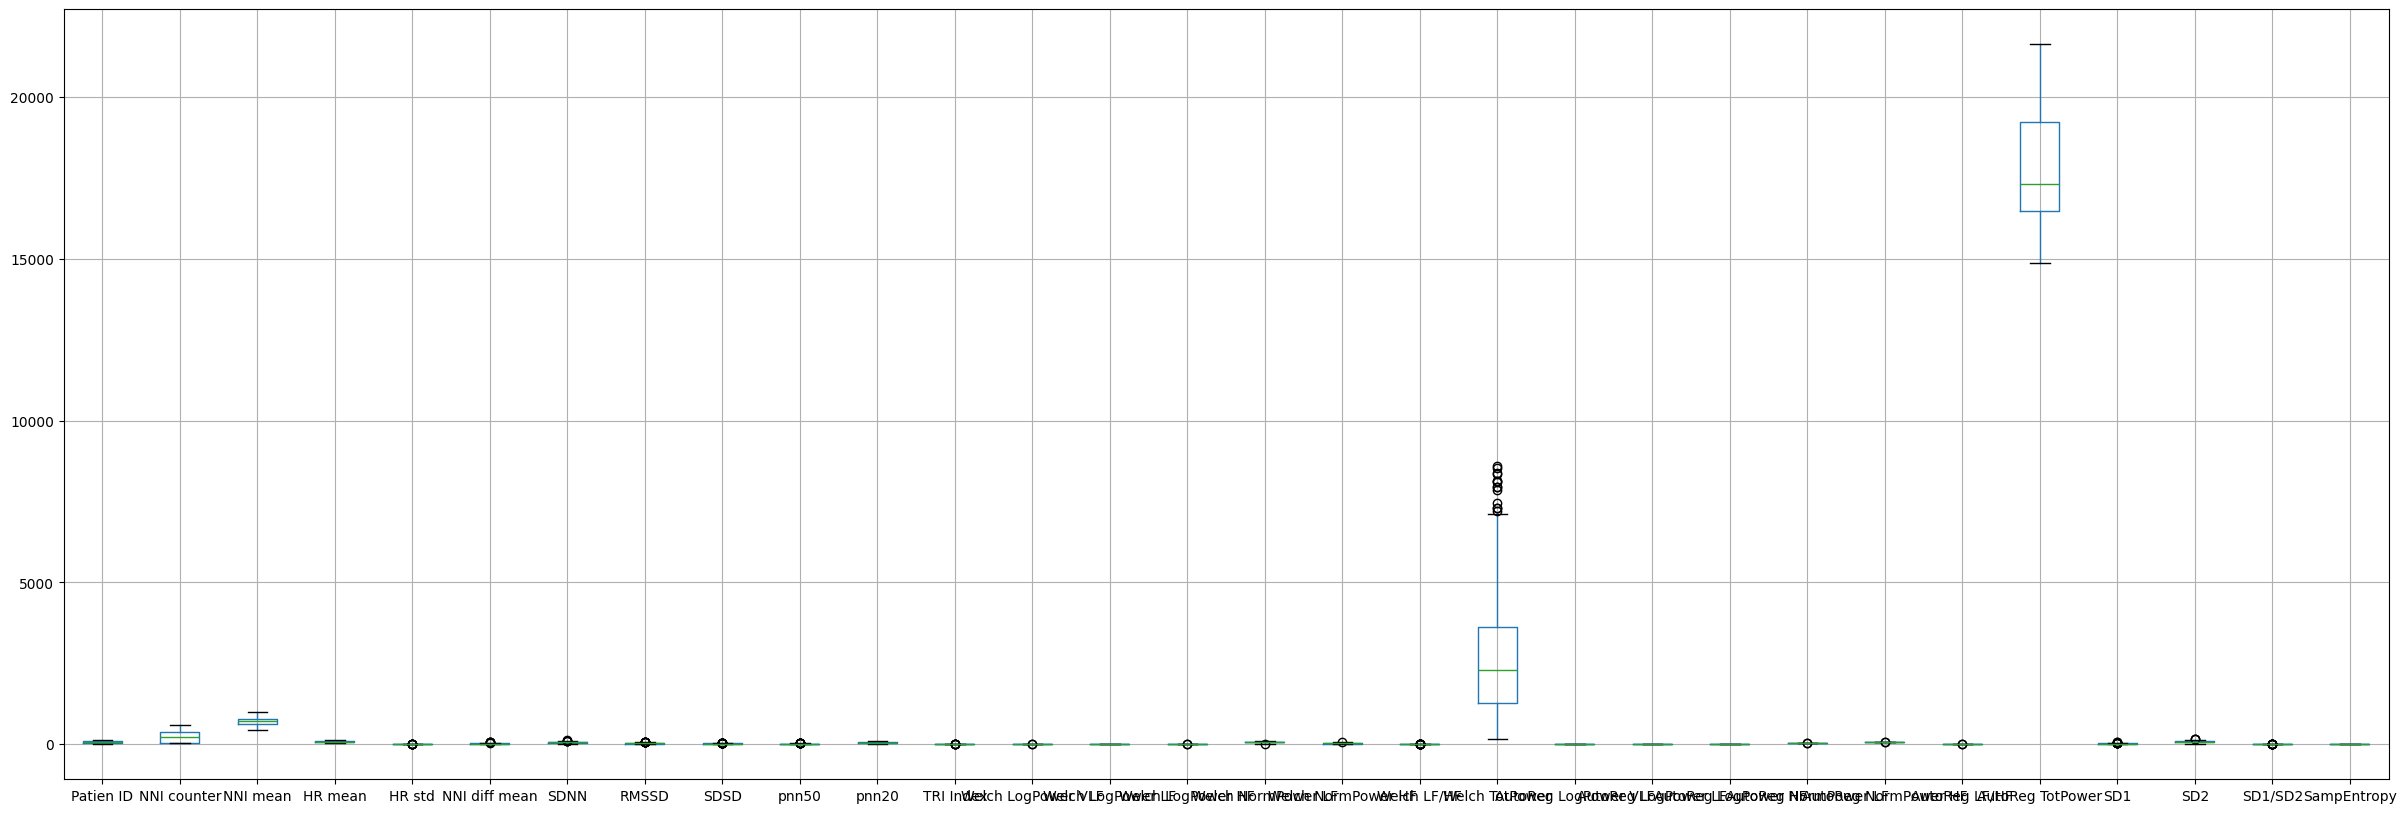

In [27]:
plt.figure(figsize=(30,10))
ecg_df.iloc[:,0:-1].boxplot(grid=True)
plt.show()

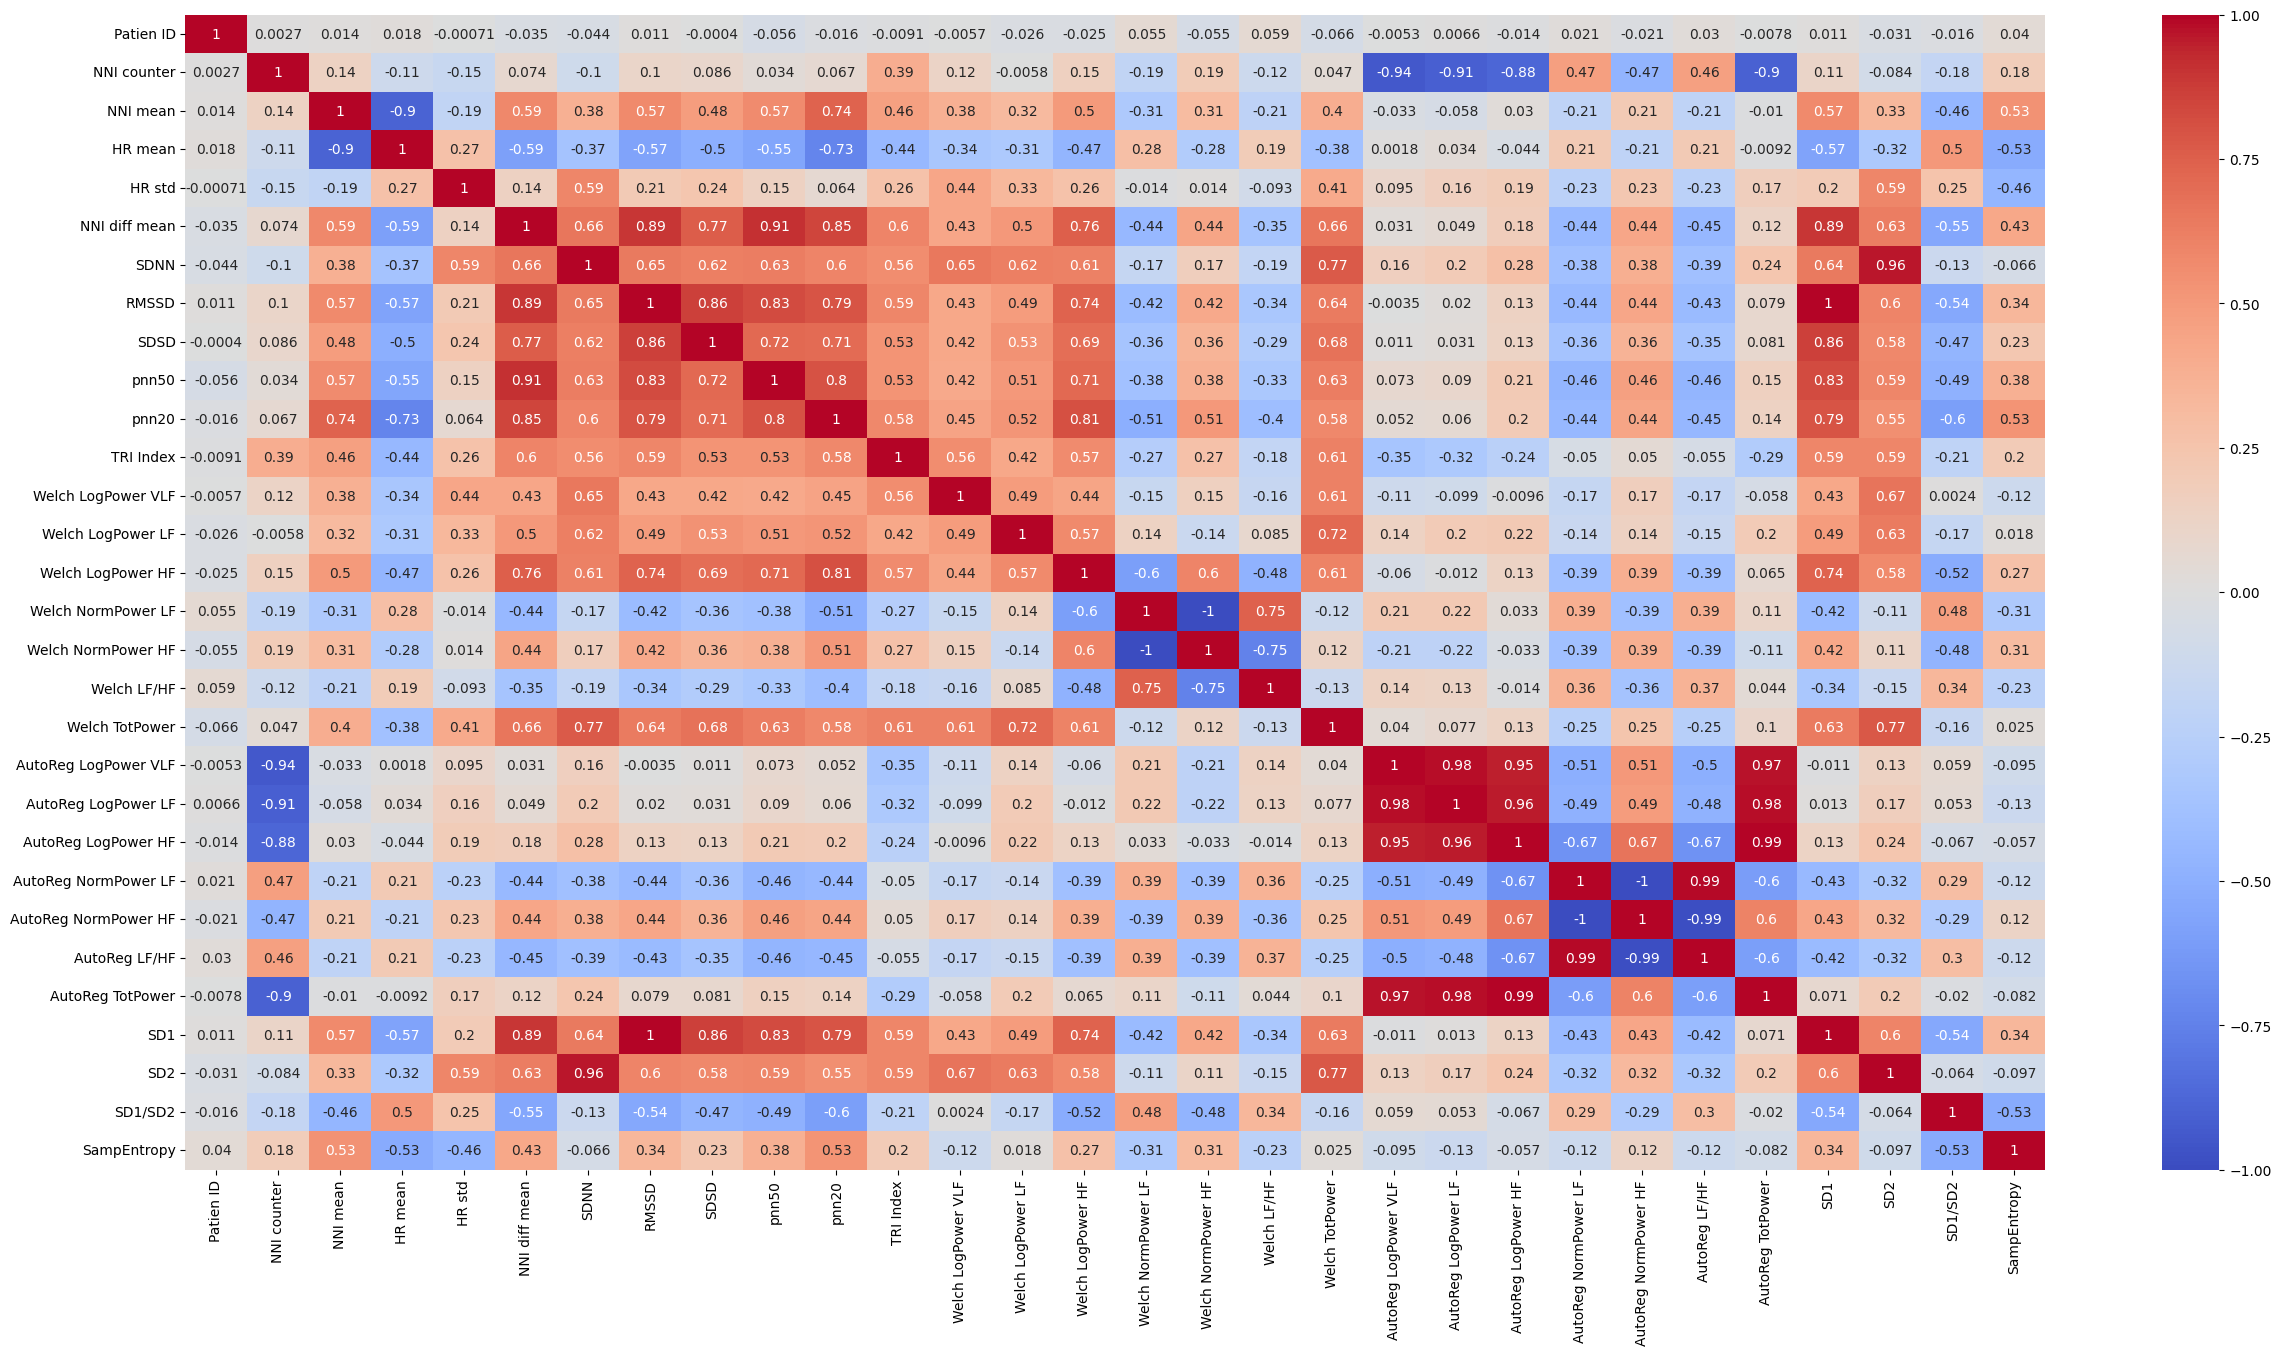

In [28]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(ecg_df)
name=ecg_df.columns
df = pd.DataFrame(df,columns=name)
X = df.iloc[:,0:-1]
Y = df['Label']
corrmat = df.corr(method='pearson')
corrmat = X.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corrmat,annot=True,cmap="coolwarm")
plt.show()

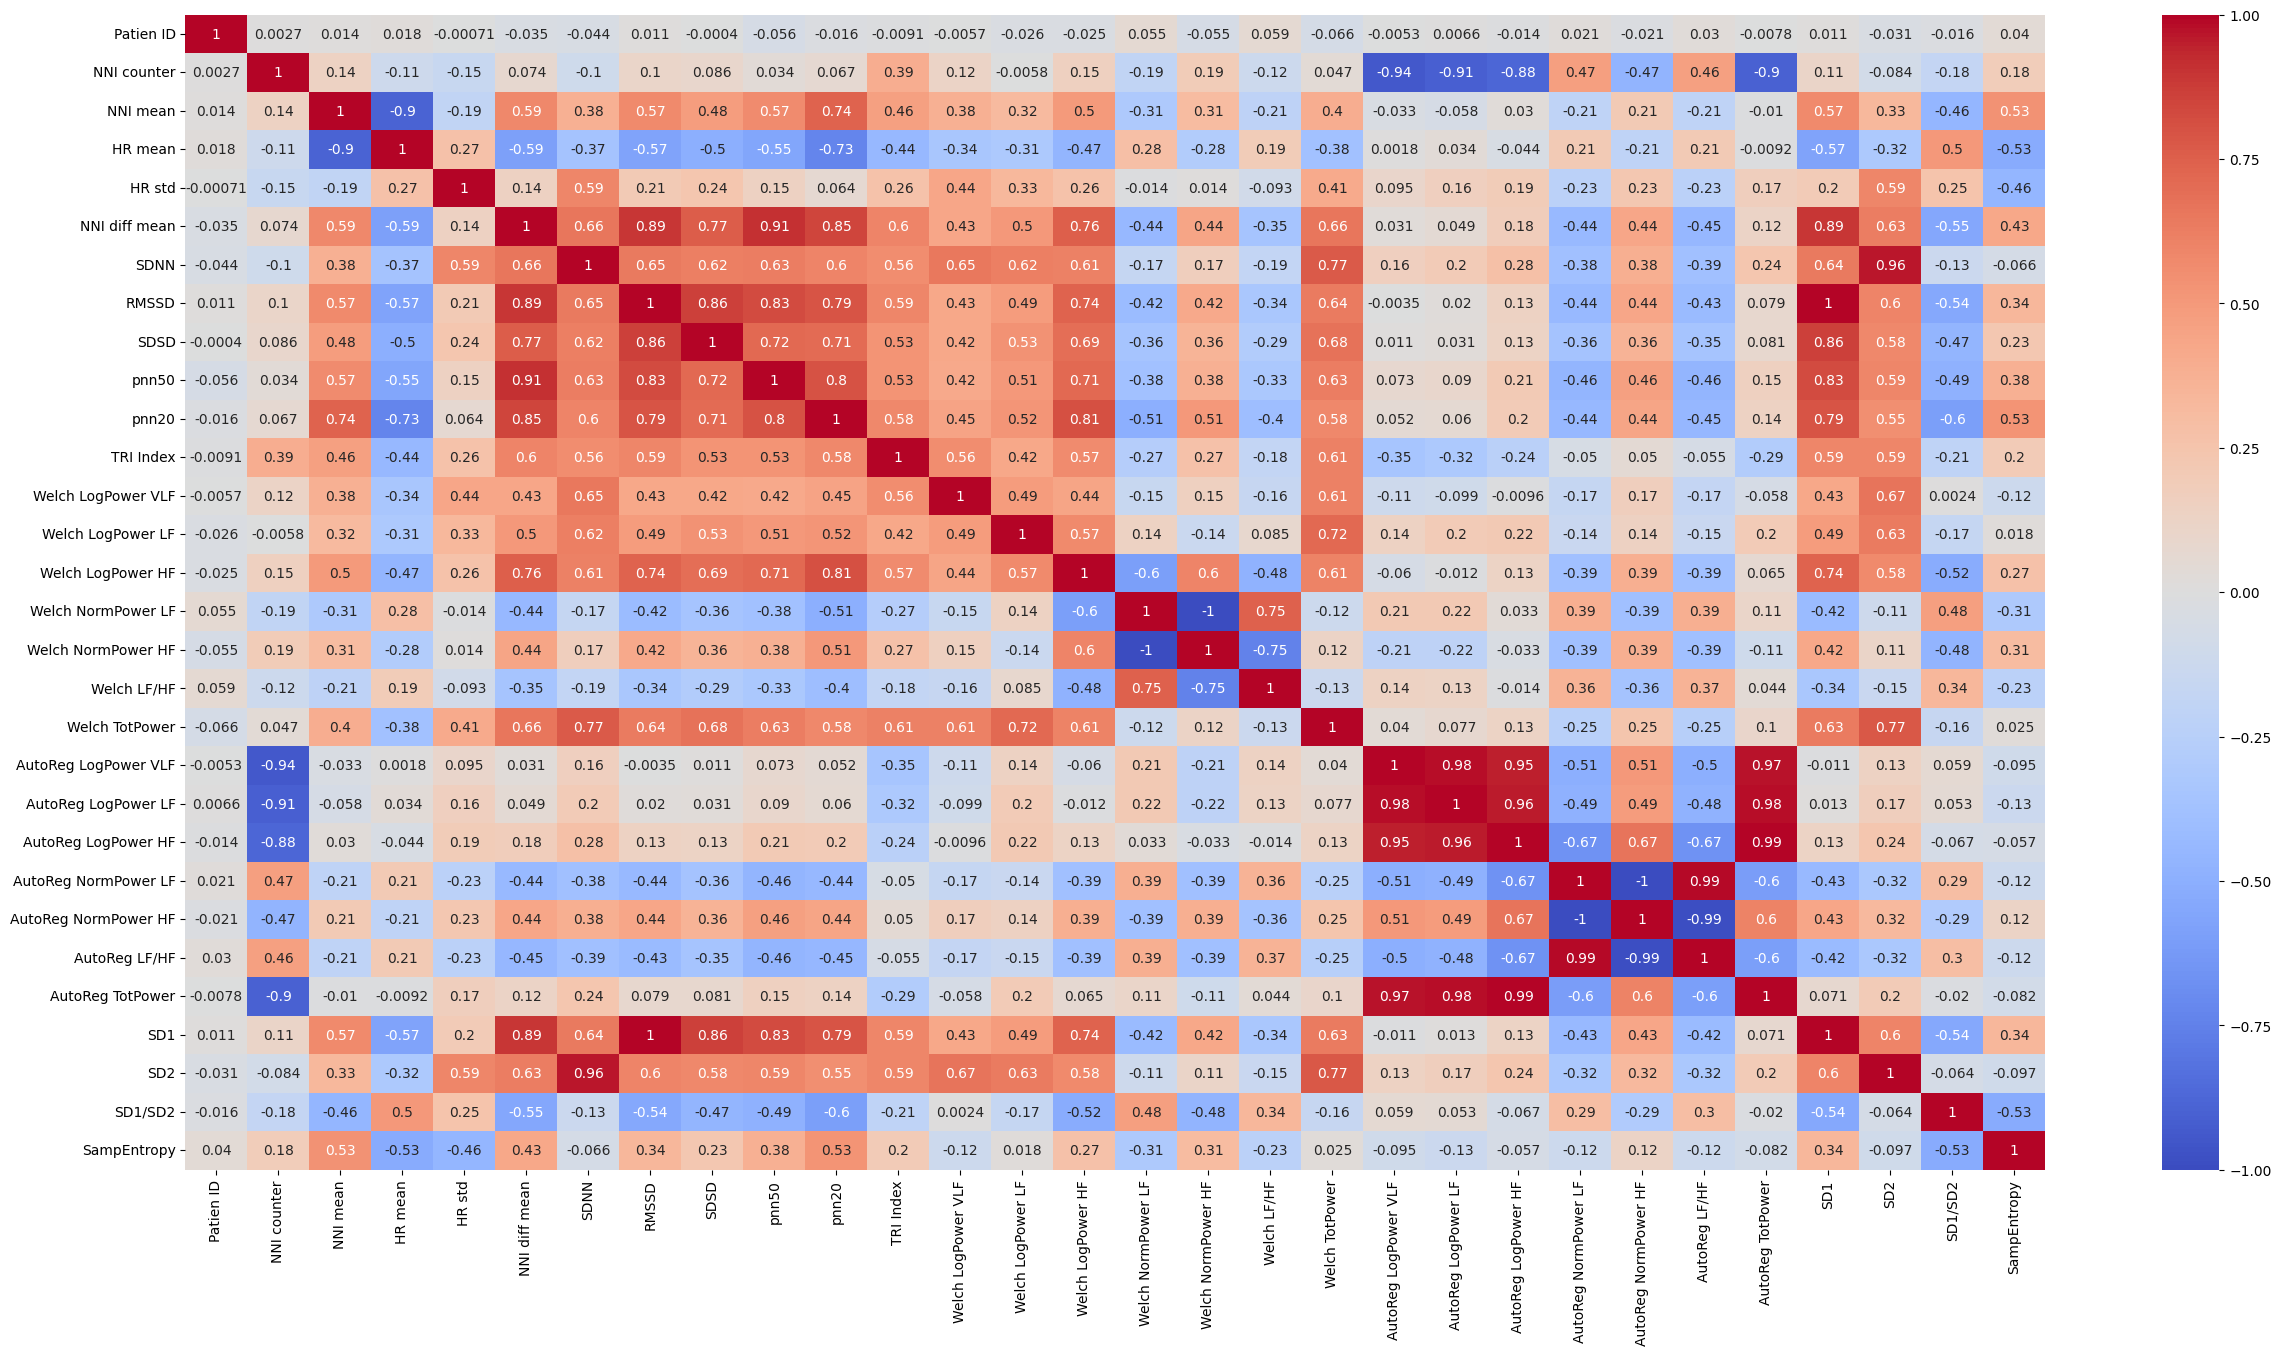

In [29]:
X = X.drop(X.columns[X.min() < -0.5],axis=1)
corrmat = X.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corrmat,annot=True,cmap="coolwarm")
plt.show()


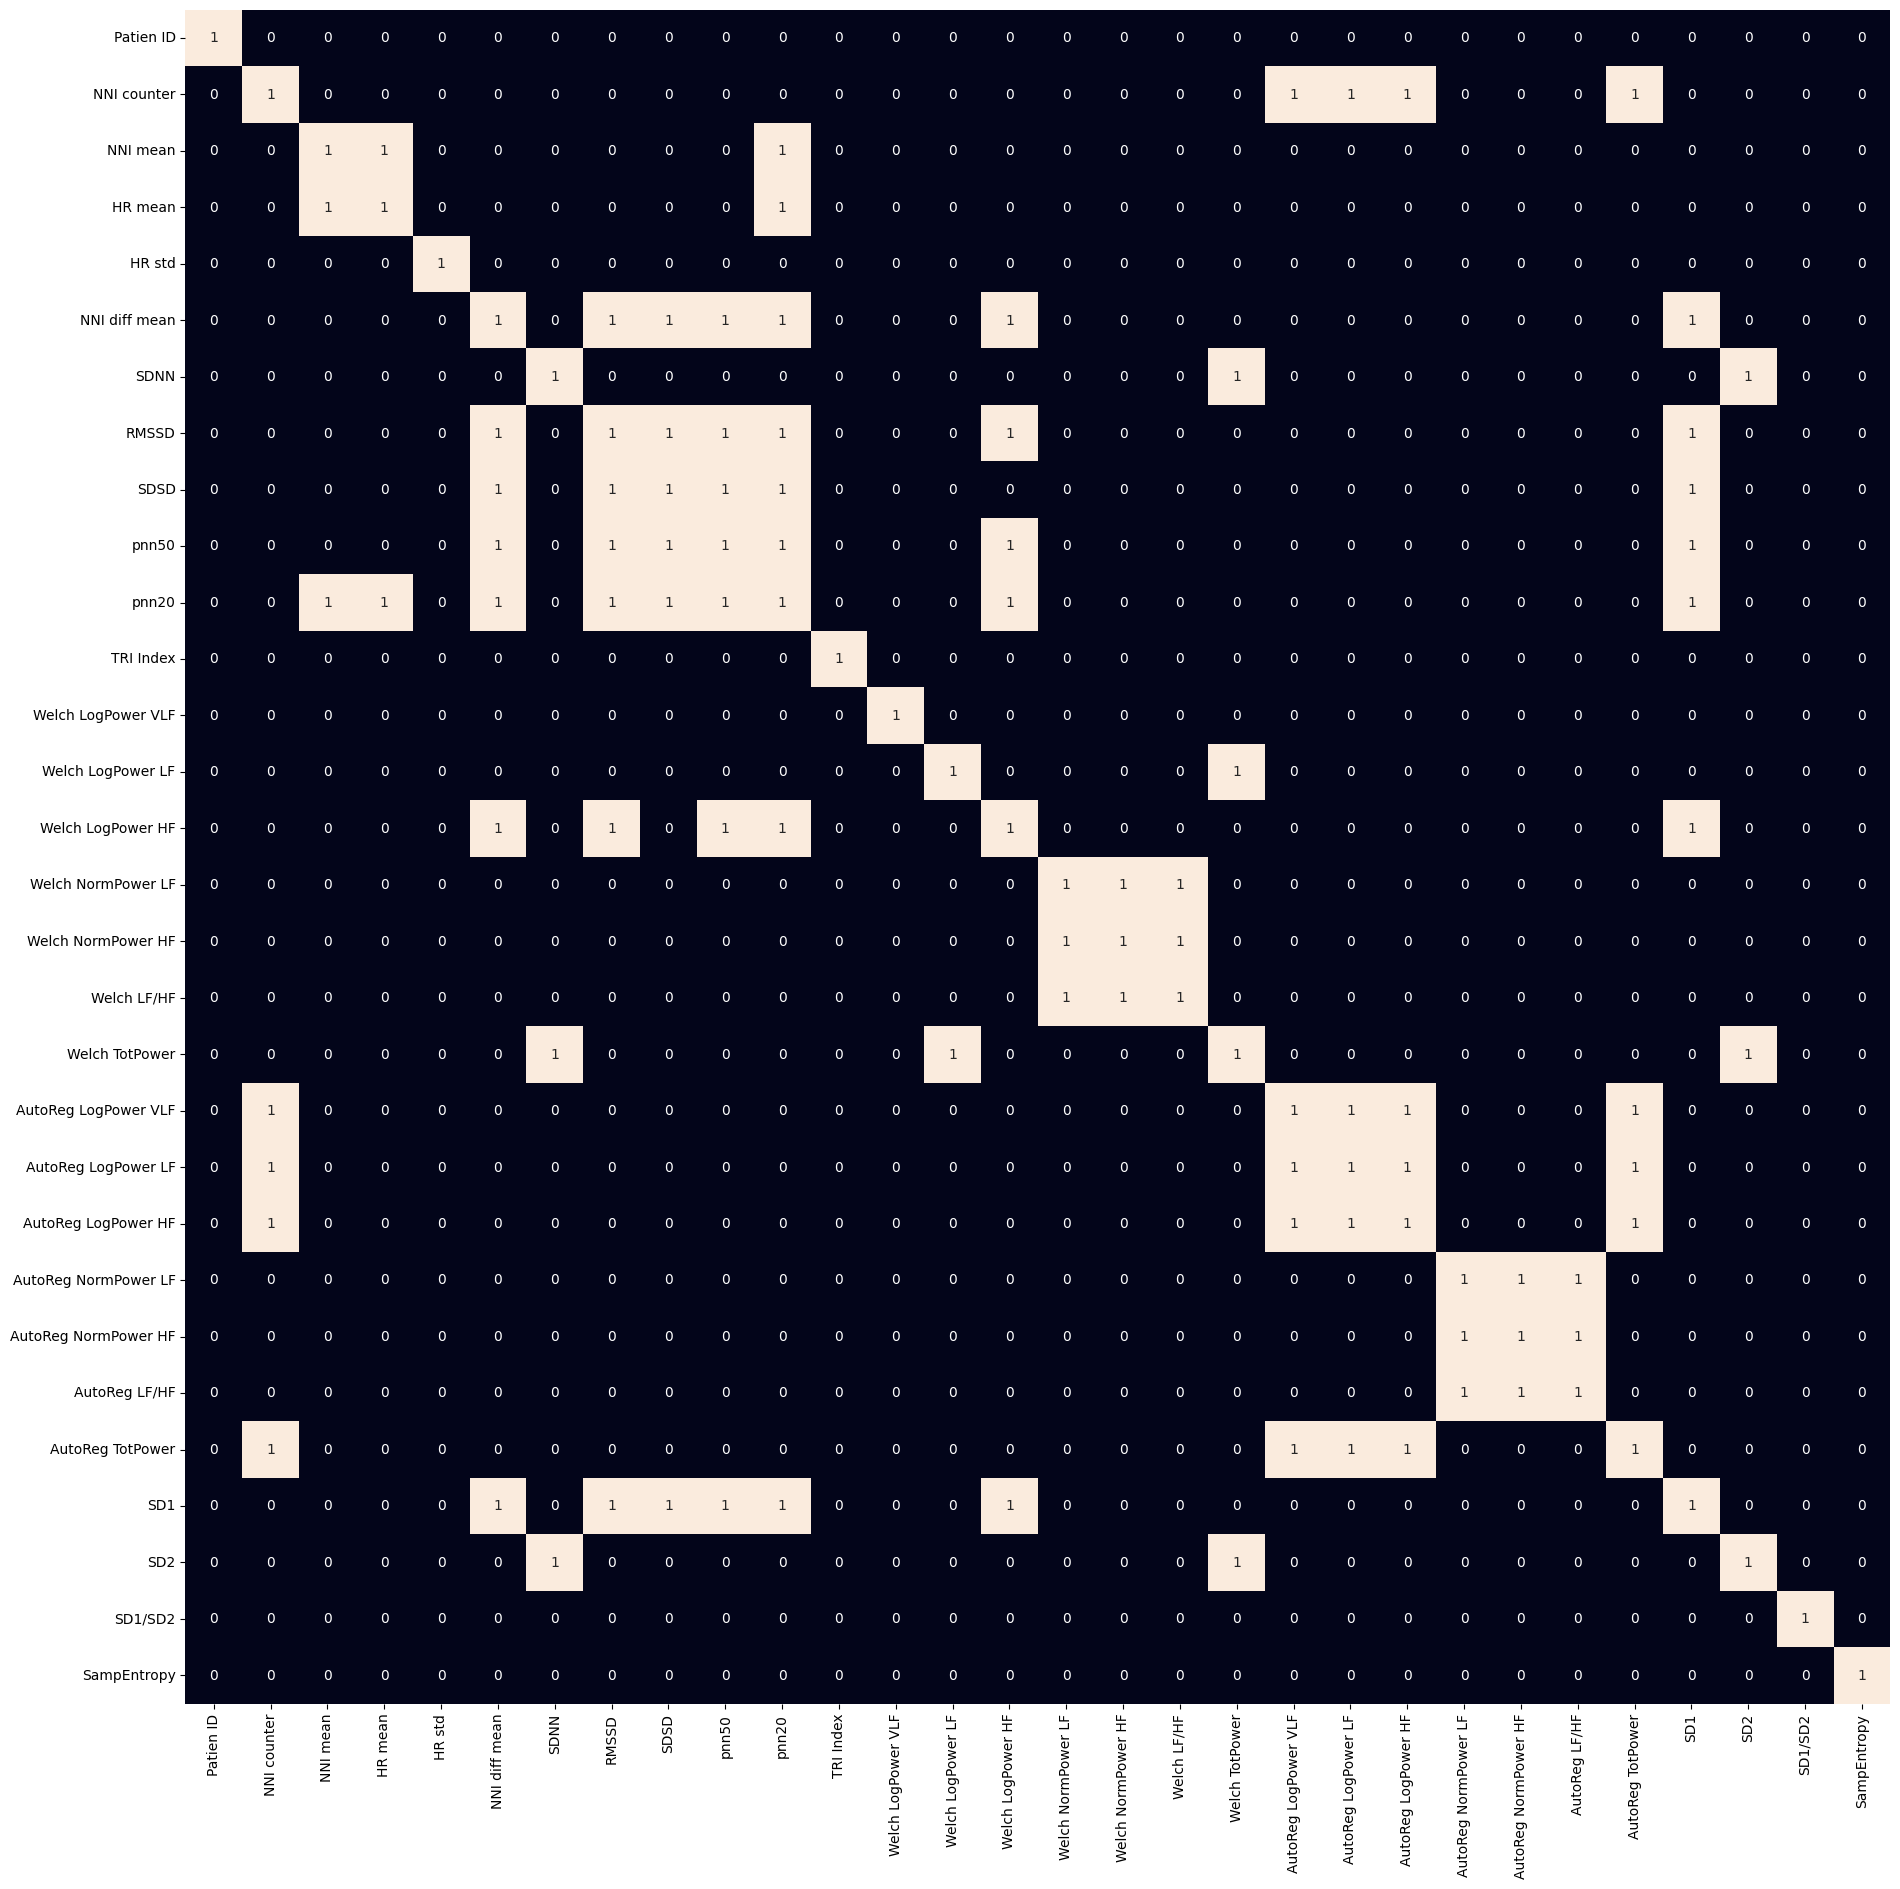

In [30]:
# If we want to highlight only the features with a correlation coefficient higher than 0.7:
plt.figure(figsize=(22, 22))
x = 0.7         # x is threshold
sns.heatmap(abs(corrmat) > x, annot=True, cbar=False)
plt.show()

In [32]:
np.fill_diagonal(corrmat.values,val=0)
(abs(corrmat)>x).sum()



Patien ID               0
NNI counter             4
NNI mean                2
HR mean                 2
HR std                  0
NNI diff mean           6
SDNN                    2
RMSSD                   6
SDSD                    5
pnn50                   6
pnn20                   8
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       1
Welch LogPower HF       5
Welch NormPower LF      2
Welch NormPower HF      2
Welch LF/HF             2
Welch TotPower          3
AutoReg LogPower VLF    4
AutoReg LogPower LF     4
AutoReg LogPower HF     4
AutoReg NormPower LF    2
AutoReg NormPower HF    2
AutoReg LF/HF           2
AutoReg TotPower        4
SD1                     6
SD2                     2
SD1/SD2                 0
SampEntropy             0
dtype: int64

In [35]:
np.fill_diagonal(corrmat.values,val=0)
pos = corrmat[corrmat > 0]
x = 0.7
pos_corr = pos[pos>x]
features = pos_corr.dropna(axis=0,how='all').columns
ind = np.where(pos_corr>0.7)
correlated_feat = list(X.columns[ind[0]])

list(set(correlated_feat))



['AutoReg LogPower VLF',
 'AutoReg NormPower LF',
 'pnn50',
 'AutoReg LogPower HF',
 'AutoReg TotPower',
 'pnn20',
 'SDSD',
 'AutoReg LogPower LF',
 'Welch LogPower HF',
 'NNI diff mean',
 'SD1',
 'Welch LF/HF',
 'Welch LogPower LF',
 'Welch TotPower',
 'RMSSD',
 'SD2',
 'SDNN',
 'AutoReg LF/HF',
 'Welch NormPower LF',
 'NNI mean']

In [37]:
# Feature Selection and Extraction
x_new = X.get(['RMSSD',
'SD1',
'Welch LF/HF',
'AutoReg NormPower LF',
'SD2',
'NNI mean',
'SDNN',
'AutoReg TotPower',
'pnn50',
'Welch LogPower HF',
'NNI diff mean',
'SDSD',
'Welch TotPower',
'AutoReg LogPower LF',
'AutoReg LF/HF',
'Welch LogPower LF',
'Welch NormPower LF',
'AutoReg LogPower VLF',
'AutoReg LogPower HF',
'pnn20'])

x_new


,RMSSD,SD1,Welch LF/HF,AutoReg NormPower LF,SD2,NNI mean,SDNN,AutoReg TotPower,pnn50,Welch LogPower HF,NNI diff mean,SDSD,Welch TotPower,AutoReg LogPower LF,AutoReg LF/HF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.382355,0.384876,0.402774,0.621214,0.411656,0.608021,0.398735,0.259781,0.184874,0.506092,0.377095,0.426199,0.316531,0.300954,0.614954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.315920,0.316827,0.271382,0.332444,0.553231,0.466358,0.535792,0.770318,0.211765,0.386785,0.346899,0.309330,0.601227,0.806144,0.331116,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.317547,0.320329,0.275471,0.677140,0.264000,0.639499,0.259830,0.306041,0.125134,0.459353,0.348740,0.306814,0.192248,0.358013,0.670880,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.327869,0.330315,0.114439,0.496106,0.552780,0.609442,0.621852,0.363857,0.651584,0.750140,0.846806,0.330543,0.715564,0.256650,0.000000,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.362874,0.365256,0.523807,0.501449,0.318876,0.504976,0.313577,0.740733,0.271493,0.490381,0.404251,0.346362,0.268465,0.818953,0.496241,0.669248,0.797930,0.764517,0.756359,0.475524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.532198,0.533183,0.127158,0.356516,0.475712,0.586881,0.504849,0.834008,0.764706,0.616831,0.582129,0.524286,0.261539,0.881788,0.354466,0.533971,0.456663,0.798546,0.854529,0.636364
422,0.807197,0.807969,0.088668,0.270585,0.506650,0.786439,0.541301,0.448853,0.349412,0.621035,0.558882,0.330543,0.309349,0.434056,0.271365,0.466753,0.357458,0.442642,0.529636,0.589091
423,0.776592,0.777509,0.190335,0.326754,0.717434,0.594370,0.720283,0.383381,0.700324,0.752556,0.767293,0.864480,0.835183,0.376178,0.325605,0.809910,0.567716,0.338352,0.464988,0.712956
424,0.156000,0.154280,0.361996,0.444465,0.572868,0.158795,0.543194,0.634392,0.039956,0.320986,0.159854,0.168193,0.181977,0.691383,0.440255,0.347695,0.725248,0.641540,0.674590,0.164666


In [39]:
model = LabelEncoder()
y = model.fit_transform(Y)
y

array([0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0,
       2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2,
       1, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4,
       0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0,
       2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2,
       4, 0, 2, 4, 0, 2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4,
       0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0,
       2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2,
       1, 0, 2, 4, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2, 4, 0, 2, 4,
       0, 2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0,
       2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2,
       4, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 3,
       0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 4, 0,

In [40]:
ecg_df['Label']


0       -1.0
1      209.0
2      309.0
3       -1.0
4      209.0
       ...  
421    209.0
422    108.0
423     -1.0
424    209.0
425    108.0
Name: Label, Length: 426, dtype: float64

In [41]:
 # SelectKbest
test = SelectKBest(score_func = chi2, k = 10)
new_X = test.fit_transform(x_new,y)
features_SKB = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':test.scores_})
print(features_SKB.sort_values(by='Ranking',ascending=False))

                 Feature    Ranking
13   AutoReg LogPower LF  44.427992
7       AutoReg TotPower  41.094363
17  AutoReg LogPower VLF  39.362072
18   AutoReg LogPower HF  34.844270
5               NNI mean   4.712225
3   AutoReg NormPower LF   4.669903
14         AutoReg LF/HF   4.529646
8                  pnn50   3.852946
1                    SD1   3.469823
19                 pnn20   3.449650
16    Welch NormPower LF   3.429206
0                  RMSSD   3.300722
10         NNI diff mean   2.917535
2            Welch LF/HF   2.692238
9      Welch LogPower HF   2.675634
11                  SDSD   2.488824
12        Welch TotPower   1.501246
15     Welch LogPower LF   0.495271
4                    SD2   0.298596
6                   SDNN   0.198706


In [42]:
x = np.median(test.scores_)
x


3.4394280411642892

<Axes: >

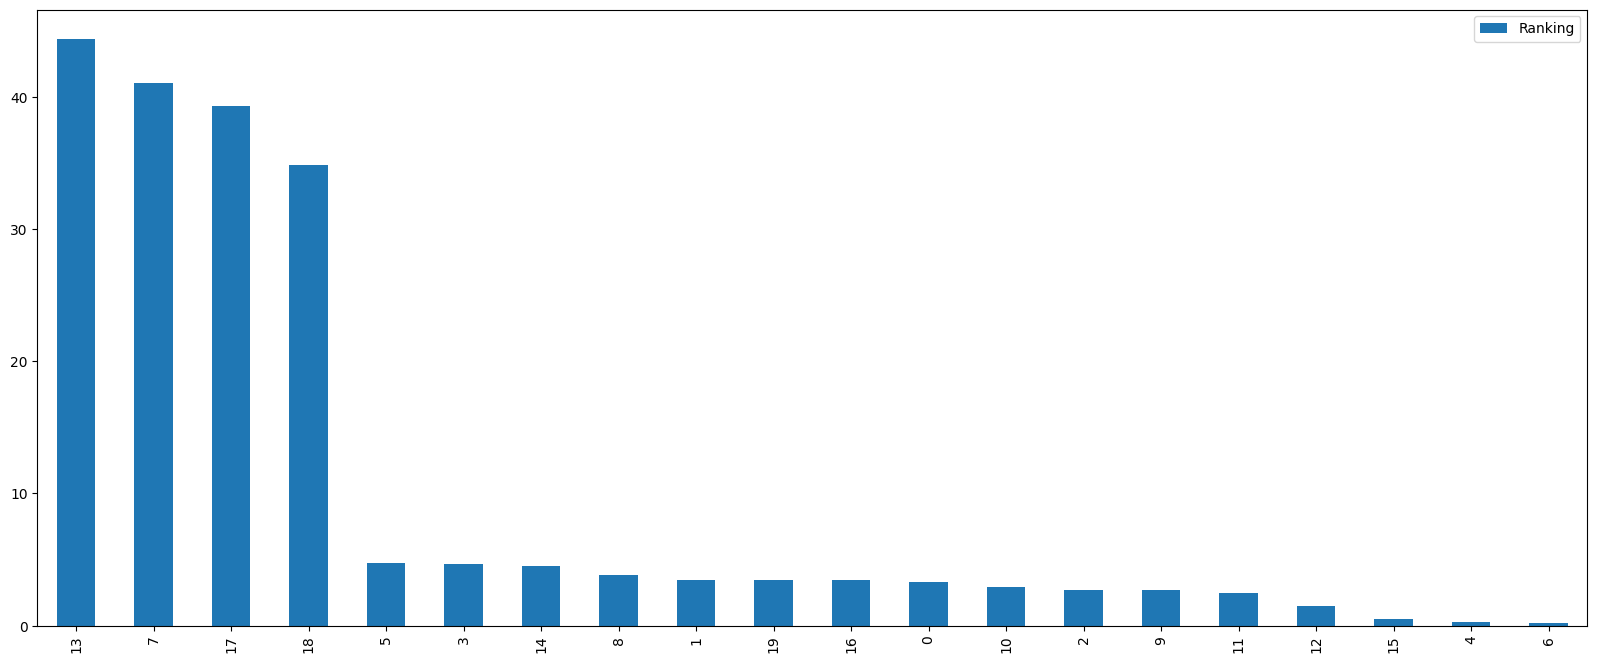

In [43]:
features_SKB.sort_values(by='Ranking',ascending=False).plot.bar(figsize=(20, 8))


In [44]:
features = np.array(x_new.iloc[:,:].columns)
filter = test.get_support()
filter

array([False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True])

In [45]:
new_X = pd.DataFrame(new_X,columns=features[filter])
new_X.iloc[0:5,:]

,SD1,AutoReg NormPower LF,NNI mean,AutoReg TotPower,pnn50,AutoReg LogPower LF,AutoReg LF/HF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.384876,0.621214,0.608021,0.259781,0.184874,0.300954,0.614954,0.234016,0.307163,0.490620
1,0.316827,0.332444,0.466358,0.770318,0.211765,0.806144,0.331116,0.767305,0.802842,0.490909
2,0.320329,0.677140,0.639499,0.306041,0.125134,0.358013,0.670880,0.414625,0.333705,0.520661
3,0.330315,0.496106,0.609442,0.363857,0.651584,0.256650,0.000000,0.308749,0.486430,0.769713
4,0.365256,0.501449,0.504976,0.740733,0.271493,0.818953,0.496241,0.764517,0.756359,0.475524


In [46]:
lr = LogisticRegression(solver='newton-cg').fit(x_new,y)
model = SelectFromModel(lr, threshold = "median", prefit=True, max_features = 10)
model.get_support()

array([False, False,  True, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True])

In [47]:
x_new.iloc[:,:].columns[model.get_support()==True]

Index(['Welch LF/HF', 'NNI mean', 'AutoReg TotPower', 'Welch LogPower HF',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [49]:
sfm_X = model.transform(x_new)
sfm_X.shape

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(426, 10)

In [50]:
sfm_X = pd.DataFrame(sfm_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
sfm_X.head()

,Welch LF/HF,NNI mean,AutoReg TotPower,Welch LogPower HF,AutoReg LogPower LF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.402774,0.608021,0.259781,0.506092,0.300954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.271382,0.466358,0.770318,0.386785,0.806144,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.275471,0.639499,0.306041,0.459353,0.358013,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.114439,0.609442,0.363857,0.750140,0.256650,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.523807,0.504976,0.740733,0.490381,0.818953,0.669248,0.797930,0.764517,0.756359,0.475524


In [51]:
lr = LogisticRegression(solver='newton-cg')
rfe = RFE(estimator = lr, n_features_to_select = 10)
rfe_X = rfe.fit_transform(x_new,y)
x_new.iloc[:,:].columns[rfe.get_support()==True]


Index(['NNI mean', 'AutoReg TotPower', 'pnn50', 'Welch LogPower HF',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [52]:
features = np.array(x_new.iloc[:,:].columns)
filter = rfe.get_support()
filter


array([False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True])

In [54]:
rfm_X = pd.DataFrame(rfe_X,columns=features[filter])
rfm_X.iloc[0:5,:]

,NNI mean,AutoReg TotPower,pnn50,Welch LogPower HF,AutoReg LogPower LF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.608021,0.259781,0.184874,0.506092,0.300954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.466358,0.770318,0.211765,0.386785,0.806144,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.639499,0.306041,0.125134,0.459353,0.358013,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.609442,0.363857,0.651584,0.750140,0.256650,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.504976,0.740733,0.271493,0.490381,0.818953,0.669248,0.797930,0.764517,0.756359,0.475524


In [55]:
clf = ExtraTreesClassifier(n_estimators=50).fit(x_new,y)
model = SelectFromModel(clf,threshold = "median", prefit=True)
model.get_support()


array([False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True])

In [56]:
features_DT = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':clf.feature_importances_})
print(features_DT.sort_values(by='Ranking',ascending=False))

                 Feature   Ranking
13   AutoReg LogPower LF  0.147762
17  AutoReg LogPower VLF  0.134834
7       AutoReg TotPower  0.118480
18   AutoReg LogPower HF  0.105214
5               NNI mean  0.043006
14         AutoReg LF/HF  0.037648
3   AutoReg NormPower LF  0.037205
16    Welch NormPower LF  0.035839
19                 pnn20  0.031954
8                  pnn50  0.031457
0                  RMSSD  0.030059
11                  SDSD  0.029814
9      Welch LogPower HF  0.029713
10         NNI diff mean  0.028488
1                    SD1  0.028383
15     Welch LogPower LF  0.028308
6                   SDNN  0.026503
4                    SD2  0.025700
12        Welch TotPower  0.025159
2            Welch LF/HF  0.024474


In [57]:
np.median(clf.feature_importances_)


0.03075818184595315

In [58]:
etc_X = model.transform(x_new)
etc_X.shape

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(426, 10)

In [59]:
etc_X = pd.DataFrame(etc_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
etc_X.head()


,AutoReg NormPower LF,NNI mean,AutoReg TotPower,pnn50,AutoReg LogPower LF,AutoReg LF/HF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.621214,0.608021,0.259781,0.184874,0.300954,0.614954,0.747731,0.234016,0.307163,0.490620
1,0.332444,0.466358,0.770318,0.211765,0.806144,0.331116,0.938535,0.767305,0.802842,0.490909
2,0.677140,0.639499,0.306041,0.125134,0.358013,0.670880,0.662543,0.414625,0.333705,0.520661
3,0.496106,0.609442,0.363857,0.651584,0.256650,0.000000,0.427345,0.308749,0.486430,0.769713
4,0.501449,0.504976,0.740733,0.271493,0.818953,0.496241,0.797930,0.764517,0.756359,0.475524


In [63]:
sfs_forward = SequentialFeatureSelector(estimator = clf,n_features_to_select=10,direction = 'forward').fit(x_new,y)
sfs_forward.get_support()

array([ True, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True, False])

In [64]:
x_new.iloc[:,:].columns[sfs_forward.get_support()==True]


Index(['RMSSD', 'SD2', 'NNI mean', 'pnn50', 'SDSD', 'Welch TotPower',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'AutoReg LogPower VLF',
       'AutoReg LogPower HF'],
      dtype='object')

In [65]:
X_new4 = sfs_forward.transform(x_new)
X_new4.shape


(426, 10)

In [66]:
sfs_X = pd.DataFrame(X_new4,columns=x_new.iloc[:,:].columns[sfs_forward.get_support()==True])
sfs_X.head()

,RMSSD,SD2,NNI mean,pnn50,SDSD,Welch TotPower,AutoReg LogPower LF,Welch LogPower LF,AutoReg LogPower VLF,AutoReg LogPower HF
0,0.382355,0.411656,0.608021,0.184874,0.426199,0.316531,0.300954,0.631289,0.234016,0.307163
1,0.315920,0.553231,0.466358,0.211765,0.309330,0.601227,0.806144,0.793697,0.767305,0.802842
2,0.317547,0.264000,0.639499,0.125134,0.306814,0.192248,0.358013,0.480303,0.414625,0.333705
3,0.327869,0.552780,0.609442,0.651584,0.330543,0.715564,0.256650,0.699032,0.308749,0.486430
4,0.362874,0.318876,0.504976,0.271493,0.346362,0.268465,0.818953,0.669248,0.764517,0.756359


In [72]:
x = x_new.get(['SD1', 'Welch LF/HF', 'NNI mean', 'AutoReg TotPower', 'pnn50', 'SDSD',
 'AutoReg LogPower LF', 'AutoReg LF/HF', 'AutoReg LogPower VLF',
 'pnn20'])


In [73]:
nertia = []
for k in range(2,15,1):
    kmeans = KMeans(n_clusters = k,random_state = 1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    print("Tested kMeans with k = %d\tInertia: %5.4f" % (k, kmeans.inertia_))

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tested kMeans with k = 2	Inertia: 137.1165
Tested kMeans with k = 3	Inertia: 89.2209
Tested kMeans with k = 4	Inertia: 74.0928


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 5	Inertia: 63.4320
Tested kMeans with k = 6	Inertia: 59.2328
Tested kMeans with k = 7	Inertia: 55.0517
Tested kMeans with k = 8	Inertia: 51.2279


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 9	Inertia: 48.5661
Tested kMeans with k = 10	Inertia: 47.0160
Tested kMeans with k = 11	Inertia: 43.8961


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 12	Inertia: 42.5766
Tested kMeans with k = 13	Inertia: 40.8841
Tested kMeans with k = 14	Inertia: 39.4598


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


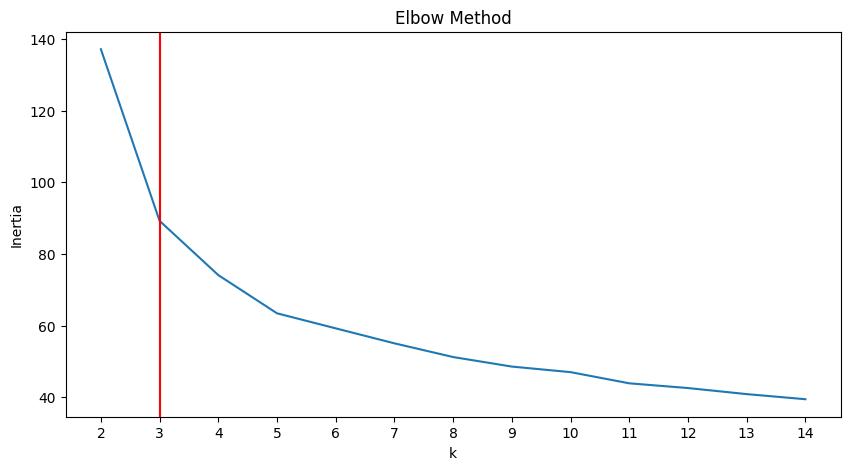

In [74]:
figure(figsize = (10,5))
plt.plot(inertia),
plt.xticks(range(0,13,1),range(2,15,1))
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.axvline(1, color = "r")
plt.show()

In [75]:
pca = PCA(n_components=3)
x_pca_fit = pca.fit_transform(x)
print(x_pca_fit.shape,'\n\n 5 observations of the new df:\n',x_pca_fit[0:5])

(426, 3) 

 5 observations of the new df:
 [[-0.09447061 -0.3001856   0.15766382]
 [ 0.19231243  0.5874245  -0.08159365]
 [-0.11564212 -0.1506825   0.04289107]
 [ 0.44296139 -0.26593866 -0.26026686]
 [ 0.16472621  0.56182228  0.22626792]]


<Axes: >

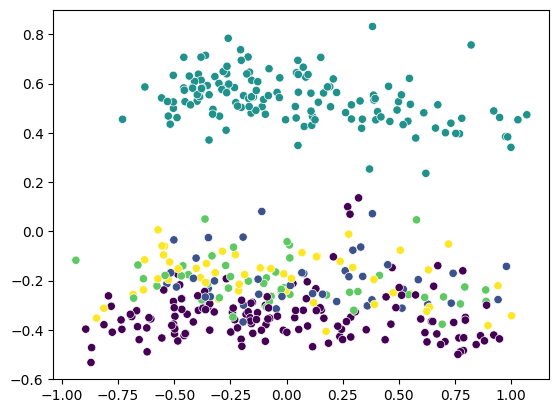

In [76]:
sns.scatterplot(x=x_pca_fit[:,0], y=x_pca_fit[:,1],c=y)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 10) (128, 10) (298,) (128,)


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_fit, y, test_size = 0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 3) (128, 3) (298,) (128,)


In [79]:
logreg = LogisticRegression(max_iter=500,random_state=0)
logreg.fit(x_train,y_train)
lr_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, lr_pred)
print(cnf_matrix)


[[42  0  0  0  0]
 [12  0  0  0  0]
 [ 0  0 48  0  0]
 [11  0  0  0  0]
 [14  0  0  1  0]]


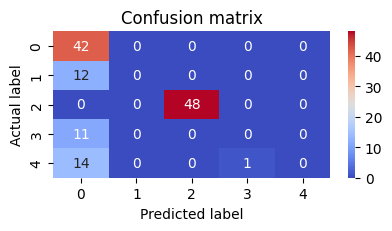

In [80]:
plt.figure(figsize=(4,2))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [81]:
print(classification_report(y_test,lr_pred))


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        42
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        48
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        15

    accuracy                           0.70       128
   macro avg       0.31      0.40      0.34       128
weighted avg       0.55      0.70      0.60       128



C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

In [82]:
accuracy_score(y_test,lr_pred)


0.703125

In [83]:
y_test

array([1, 1, 1, 0, 4, 4, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 3, 2, 1, 4, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 4, 0, 2, 0, 0, 0, 2, 0, 3, 2, 2, 2,
       3, 0, 0, 2, 2, 1, 2, 0, 4, 0, 4, 4, 2, 0, 2, 0, 2, 3, 2, 3, 4, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 4, 2, 4, 0, 2, 3,
       1, 4, 0, 2, 4, 2, 3, 2, 2, 0, 4, 2, 2, 0, 1, 0, 3, 2, 1, 0, 0, 0,
       0, 1, 2, 2, 2, 0, 4, 0, 3, 0, 3, 0, 2, 3, 2, 0, 4, 2], dtype=int64)

In [84]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))


[[40  1  0  1  0]
 [ 2  5  0  3  2]
 [ 0  0 48  0  0]
 [ 5  3  0  1  2]
 [ 5  8  0  2  0]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.29      0.42      0.34        12
           2       1.00      1.00      1.00        48
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00        15

    accuracy                           0.73       128
   macro avg       0.44      0.49      0.46       128
weighted avg       0.67      0.73      0.70       128



In [85]:
accuracy_score(y_test,pred_knn)

0.734375

In [86]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[41  1  0  0  0]
 [ 8  0  0  2  2]
 [ 0  0 48  0  0]
 [ 6  2  0  0  3]
 [ 4  3  0  1  7]]
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        42
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        48
           3       0.00      0.00      0.00        11
           4       0.58      0.47      0.52        15

    accuracy                           0.75       128
   macro avg       0.46      0.49      0.47       128
weighted avg       0.67      0.75      0.70       128



In [87]:
accuracy_score(y_test,pred)


0.75

In [88]:
par = {'C': [0.1,1, 10, 100], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), par , refit = True, verbose = 3)

In [89]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.644 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [90]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [91]:
grid_pred =grid.predict(x_test)
print(metrics.confusion_matrix(y_test,grid_pred))

[[39  1  0  2  0]
 [ 3  0  0  4  5]
 [ 0  0 48  0  0]
 [ 2  3  0  0  6]
 [ 2  4  0  1  8]]


In [92]:
accuracy_score(y_test,grid_pred)

0.7421875

In [93]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        48
           3       0.00      0.00      0.00        11
           4       0.42      0.53      0.47        15

    accuracy                           0.74       128
   macro avg       0.45      0.49      0.47       128
weighted avg       0.70      0.74      0.72       128



In [94]:
accuracy_score(y_test,grid_pred)

0.7421875

In [97]:
dtc = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,random_state=0)
dtc.fit(x_train,y_train)
dtc_pred= dtc.predict(x_test)
print(metrics.confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

[[37  1  0  3  1]
 [ 2  2  0  1  7]
 [ 0  0 48  0  0]
 [ 2  1  0  4  4]
 [ 5  2  0  2  6]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.33      0.17      0.22        12
           2       1.00      1.00      1.00        48
           3       0.40      0.36      0.38        11
           4       0.33      0.40      0.36        15

    accuracy                           0.76       128
   macro avg       0.57      0.56      0.56       128
weighted avg       0.74      0.76      0.75       128



In [98]:
accuracy_score(y_train,y_train)

1.0

In [99]:
dtc= DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,random_state=0)
dtc.fit(x_train,y_train)
dtc_pred= dtc.predict(x_test)
print(metrics.confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

[[37  1  0  3  1]
 [ 2  2  0  1  7]
 [ 0  0 48  0  0]
 [ 2  1  0  4  4]
 [ 5  2  0  2  6]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.33      0.17      0.22        12
           2       1.00      1.00      1.00        48
           3       0.40      0.36      0.38        11
           4       0.33      0.40      0.36        15

    accuracy                           0.76       128
   macro avg       0.57      0.56      0.56       128
weighted avg       0.74      0.76      0.75       128



In [100]:
accuracy_score(y_test,dtc_pred)

0.7578125

In [101]:
k_to_test=range(2,15,1) 
silhouette_scores ={}
for k in k_to_test:
    model_kmeans_k = KMeans(n_clusters = k,random_state=1234 )
    model_kmeans_k.fit(x)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(x, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
print("done!")

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 2	SS: 0.3038
Tested kMeans with k = 3	SS: 0.3811
Tested kMeans with k = 4	SS: 0.3695
Tested kMeans with k = 5	SS: 0.3143


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 6	SS: 0.2860
Tested kMeans with k = 7	SS: 0.2737
Tested kMeans with k = 8	SS: 0.2507


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 9	SS: 0.2458
Tested kMeans with k = 10	SS: 0.2127
Tested kMeans with k = 11	SS: 0.2211


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Tested kMeans with k = 12	SS: 0.2164
Tested kMeans with k = 13	SS: 0.2162
Tested kMeans with k = 14	SS: 0.2164
done!


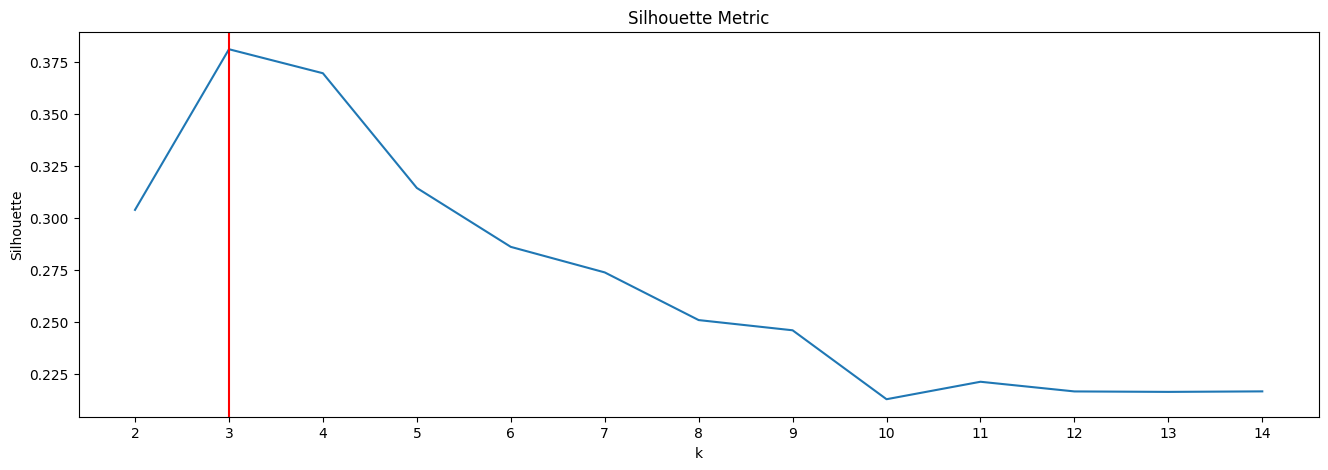

In [102]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,13,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.show()

In [103]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x_train)

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [104]:
centroids = kmeans_model.cluster_centers_
centroids.shape

(3, 3)

In [105]:
label = kmeans_model.labels_
print(confusion_matrix(label,y_train))
print(classification_report(y_train,label))

[[63 19  0 27 23]
 [37 12 12 10 13]
 [ 0  0 82  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       100
           1       0.14      0.39      0.21        31
           2       1.00      0.87      0.93        94
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        36

    accuracy                           0.53       298
   macro avg       0.32      0.38      0.34       298
weighted avg       0.49      0.53      0.50       298



C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

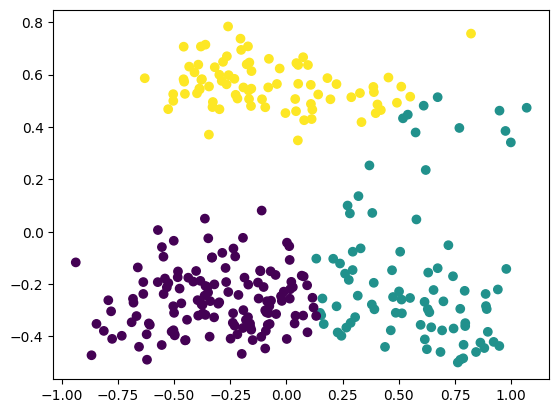

In [106]:
plt.scatter(x_train[:,0],x_train[:,1],c=label)
plt.show()

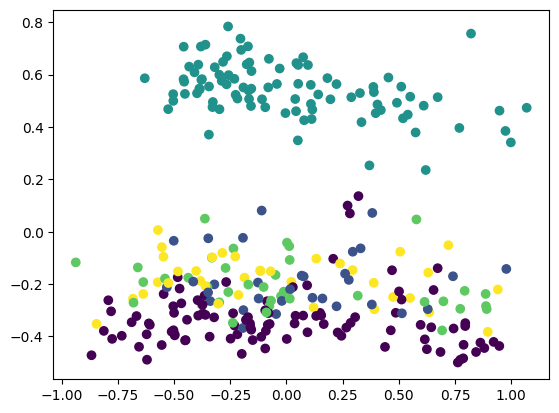

In [107]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()


In [108]:
accuracy_score(y_train,label)

0.5268456375838926

In [109]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
htc_x = hierarchical_cluster.fit(x_train)

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [110]:
htc_pred = hierarchical_cluster.fit_predict(x_test)
print(metrics.confusion_matrix(y_test,htc_pred))
print(classification_report(y_test,htc_pred))

[[42  0  0  0  0]
 [12  0  0  0  0]
 [ 0 48  0  0  0]
 [11  0  0  0  0]
 [15  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        42
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        15

    accuracy                           0.33       128
   macro avg       0.11      0.20      0.14       128
weighted avg       0.17      0.33      0.23       128



C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

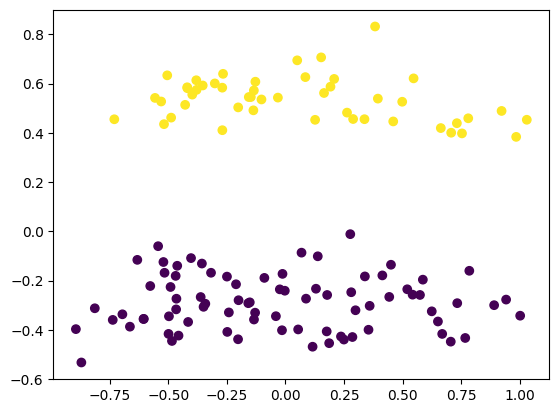

In [111]:
plt.scatter(x_test[:,0],x_test[:,1], c=htc_pred)
plt.show()

In [112]:
accuracy_score(y_test,htc_pred)


0.328125